#### <img src="https://img.icons8.com/external-flaticons-lineal-color-flat-icons/64/000000/external-image-analysis-big-data-flaticons-lineal-color-flat-icons-2.png" style="height:50px;display:inline"/> EE 046200 - Technion - Image Processing and Analysis
----

# Computer Homework 1
---
### <span style="color:red"> Due Date: 15.02.24 </span>

## <img src="https://img.icons8.com/clouds/100/000000/upload.png" style="height:50px;display:inline" /> Submission guidelines
---

### READ THIS CAREFULLY

*	**Please notice:** Some of the exercises contain questions on topics that are yet to be taught in the lecture or the frontal exercises. You may consider them as background or preparation questions to the topic before learning about it in class, or you may wait until the topic is taught, and solve only the questions on the topics you already learned.
*	**Avoid unethical behavior.** This includes plagiarism, not giving credit to source code you decide to use, and false reporting of results. Consulting with friends is allowed and even recommended, but you must write the code on your own, independently of others. The staff will treat unethical behavior with the utmost severity. **!אנא המנעו מהתנהגות שאינה אתית והעתקות**
*	Code submission in **Python only**.
    You can choose your working environment:
    * You can work in a Jupyter Notebook , locally with <a href="https://www.anaconda.com/distribution/">Anaconda</a> (the course's computer HW will not require a GPU).
    * You can work in a Python IDE such as <a href="https://www.jetbrains.com/pycharm/">PyCharm</a> or <a href="https://code.visualstudio.com/">Visual Studio Code</a>. Both also allow opening/editing Jupyter Notebooks.
*	The exercise must be submitted **IN PAIRS** (unless the computer homework grader approved differently) until **<span style="color:red"> Thursday 15.02.2024 at 23:55</span>**.
*	The exercise will be submitted via Moodle in the following form:
    Only one of the students will submit the assignment. That student will submit two **separated** files:
    * A report file (visualizations, discussing the results and answering the questions) in a `.pdf` format, with the name `hw1_id1_id2.pdf` where `id1` and 'id2' are the ID number of the submitting students.
        * Be precise, we expect on point answers. But don't be afraid to explain you statements (actually, we expect you to).
        * Even if the instructions says "Show/Display...", you still need to explain what are you showing and what can be seen.
        * No other file-types ( `.docx` , `.html` , ...) will be accepted
    * A compressed `.zip` file, with the name: `hw1_id1_id2.zip` which contains:
        * A folder named `code` with all the code files inside ( `.py` or `.ipynb` ONLY!)
            *	The code should be reasonably documented, especially in places where non-trivial actions are performed.
            *	Make sure to give a suitable title (informative and accurate) to each image or graph, and also to the axes. Ensure that graphs and images are displayed in a sufficient size to understand their content (and maintain the relationship between the axes - do not distort them).
        * A folder named `my_data`, with all the files required for the code to run (your own images/videos). make sure to refer to your input files in the code locally. i.e. (if the code is in 'code' directory, and the input file is in a parallel 'my_data' directory:
            `img = cv2.imread('../my_data/my_img.jpg')`
        * **DO NOT** include the given input data in the zip. The code should refer to the given input data as it is located in a folder named `given_data`. i.e.:
            `img = cv2.imread('../given_data/given_img.jpg')`
*	If you submit your solution after the deadline, 4 points will be reduced automatically for each of the days that have passed since the submission date (unless you have approved it with the course staff before the submission date). Late submission will be done directly to the computer homework grader via mail, and not via Moodle.
*	Several Python, numpy, openCV reference files are attached in the Moodle website, and you can of course also use the Internet's help.
*	Questions about the **computer** exercise can be directed to the computer homework grader through the relevant Moodle forum or by email **and not during the workshop hours**.


## <img src="https://img.icons8.com/bubbles/50/000000/checklist.png" style="height:50px;display:inline"> General Notes:
---
### The ‘imshow’ function:
Full name: `matplotlib.axes.Axes.imshow`

The ‘imshow’ function is used to display images. The function expects to get a matrix whose members are in "discrete" `unit8` format (in the range [0,255]) or in "continuous" `float` format (in the range [0,1]). the dynamic range is determined by the format. These formats are acceptable for images. 

### Discrete Fourier Transform:
2-dimentional discrete Fourier transform (2D-DFT) in numpy is done using the function `np.fft.fft2`. After the transform, use `np.fft.fftshift` to bring the low frequencies to the center of the transform image.

**IMPORTANT NOTE:** When using `fftshift` after `fft2`, you must not forget to use `ifftshift` before performing the inverse transform `ifft2`. In addition, there is no need to convert the image to double before the transform.

**Convenient representation scale for transformation:** Note that displaying the amplitude of the transform on a log scale: `np.log(1 + np.abs(...))` allows large and small values to be seen in the same image. This overcomes the contrast problem created by the Fourier transform.


In [14]:
# imports for the HW
import numpy as np
import matplotlib.pyplot as plt
import cv2

## <img src="https://img.icons8.com/flat-round/64/000000/audio-wave-1.png" style="height:50px;display:inline"/> Part 1 - Information In Frequency
---
**Note: In the illustrations displayed in this question the white areas are the areas to keep in the transform.**

Exercise 3 shows the definition of the continuous 2-D Fourier transform. In practice, in image processing applications 2-dimentional discrete Fourier transform (2D-DFT) of the image is used. The 2D-DFT of an image $f[n,m] \in \mathbb{R}^{M\times N}$ is defined as:

$F[k,l]=\mathcal{F}_{DFT}\{f[m,n]\}=\frac{1}{MN}\sum_{m=0}^{M-1}\sum_{n=0}^{N-1}f[m,n]e^{-j2\pi(\frac{m}{M}k+\frac{n}{N}l)}$

The transform calculation in numpy is performed using the `np.fft.fft2` function.

In this question we will get a basic intuition concerning the information in the frequency domain image we get after performing the transform.



### 1.a - Create the input - an image of a building
Take a picture of a building on the Technion campus, name it `building.jpg` and include in your report the type of camera you used. In order to get the most out of this question make sure that the image will contain the whole building and unique elements like windows, porches, doors, etc. For example:

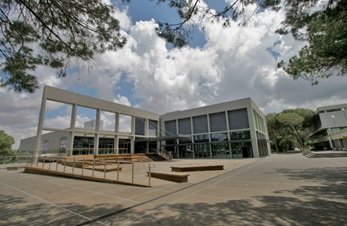 

Load the original image and display it and its grayscale image. You should also make sure that the image is in `uint8` format. For the rest of the question, we will use only the grayscale image.

Text(0.5, 1.0, 'Grayscale Image1')

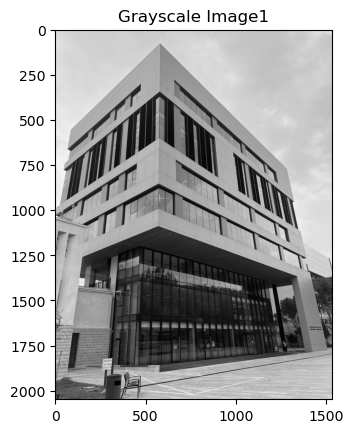

In [15]:
img = cv2.imread("../given_data/building.jpg")
gray_img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
uint8_gray_img = np.uint8(gray_img)
plt.imshow(uint8_gray_img, cmap='gray')
plt.title("Grayscale Image1")
#cv2.waitKey(0)
#cv2.destroyAllWindows()


# 1.b - 2D-DFT
Display the 2D-DFT of the image (amplitude only as explained in the general note at the beginning of the document).

Text(0.5, 1.0, '2dfft')

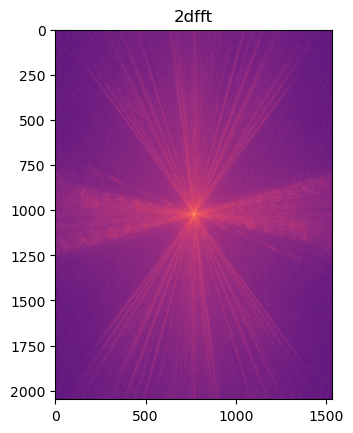

In [16]:
img =uint8_gray_img
dft = np.fft.fft2(img)
dft_shifted = np.fft.fftshift(dft)
magnitude_spectrum = np.log(1 + np.abs(dft_shifted))
#cv2.imshow(magnitude_spectrum, cmap='gray')
plt.imshow( magnitude_spectrum,cmap='magma')
plt.title('2dfft')
#cv2.waitKey(0)
#cv2.destroyAllWindows()
#plt.show()

### 1.c - Low pass frequency filtering
Display the low frequencies of the image according to the following guidelines:
1.	The lowest 2% of the frequencies in the l direction (with all their frequencies in the k direction).
2.	The lowest 2% of the frequencies in the k direction (with all their frequencies in the l direction).
3.	 The lowest 2% of the frequencies in the l direction (with all their frequencies in the k direction) and the lowest 2% of the frequencies in the k direction (with all their frequencies in the l direction).
Notice that the low frequencies have the smallest indices, but after using `fftshift` these frequencies will appear in the center of the image’s relevant axis. In addition, the frequencies that are not zeroes should be in the shape of a “strip”, like in the illustration:

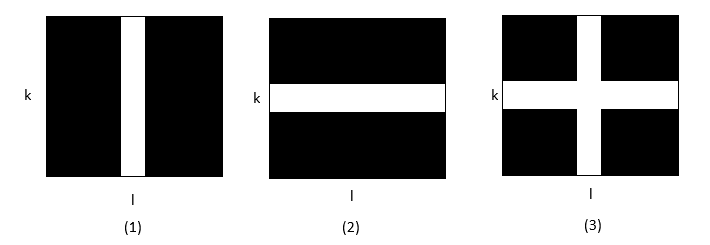

Do this by zeroing the frequencies that aren’t in the required range in the original transform image. 

Display the three results in frequency domain and the three images obtained after performing the inverse transform. Notice the images' values after the inverse transform - they will be complex. Obtain real values by applying `abs()` on the result.  

Write your conclusions concerning the differences between the original image and the images after the frequency filtering.

**Do not** use loops.

Text(0.5, 1.0, '1.c.1')

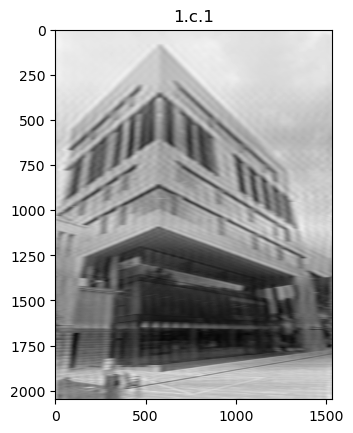

In [17]:
rows, cols = dft.shape
low_cols = int(cols * (2 / 100))
mask_cols = np.zeros_like(dft)
mask_cols[:, :low_cols] = 1
#mask_cols[:, cols//2:cols//2+ low_cols ] = 1
dft_low_cols = dft * mask_cols
dft_low_cols_shifted=np.fft.fftshift(dft_low_cols)
img_low_frequencies = np.fft.ifft2(dft_low_cols)
img_low_frequencies_abs=np.abs(img_low_frequencies)
plt.imshow( img_low_frequencies_abs,cmap='gray')
plt.imshow( np.log(1 + np.abs(dft_low_cols_shifted)),cmap='magma')
plt.title('1.c.1')


Text(0.5, 1.0, '1.c.2')

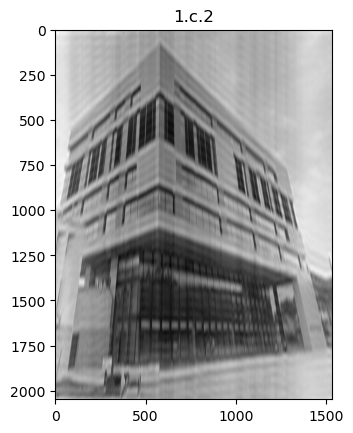

In [18]:
low_rows = int(rows * (2 / 100))
mask_rows = np.zeros_like(dft)
# mask_rows = np.zeros_like(dft_shifted)
mask_rows[:low_rows,:] = 1
# mask_rows[ rows//2 - low_rows:rows//2 +low_rows ,:] = 1

dft_low = dft * mask_rows
dft_low_shifted = np.fft.fftshift(dft_low)
#dft_low=np.fft.ifftshift(dft_shifted_low)
img_low_frequencies = np.fft.ifft2(dft_low)
img_low_frequencies_abs=np.abs(img_low_frequencies)
plt.imshow( img_low_frequencies_abs,cmap='gray')
plt.imshow( np.log(1 + np.abs(dft_low_shifted)),cmap='magma')
plt.title('1.c.2')

Text(0.5, 1.0, '1.c.3')

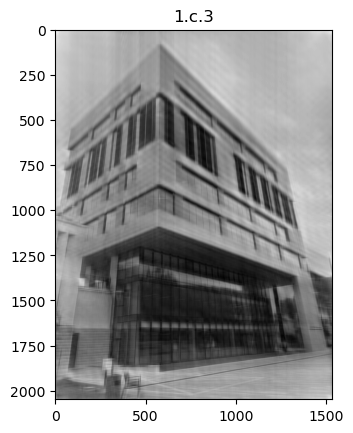

In [19]:
mask= mask_rows
mask[:, :low_cols] = 1
dft_low_both = dft * mask
dft_low_both_shifted=np.fft.fftshift(dft_low_both)
img_low_frequencies = np.fft.ifft2(dft_low_both)
img_low_frequencies_abs=np.abs(img_low_frequencies)
plt.imshow( img_low_frequencies_abs,cmap='gray')
plt.imshow( np.log(1 + np.abs(dft_low_both_shifted)),cmap='magma')

plt.title('1.c.3')

### 1.d - Max pass frequency filtering
Implement the `max_freq_filtering` function: the function will accept the fft of an image **after fftshift** - `fshift` and find `precentege` of the most dominant 2-dimensional frequencies of the whole image, meaning frequencies for which the **amplitude** of the transform is maximal, and choose them (again, by zeroing the other frequencies). The function will return the filtered frequency domain result `fMaxFreq` and the filtered image `imgMaxFreq`.

In [20]:
def max_freq_filtering(fshift, precentege):
    """
    Reconstruct an image using only its maximal amplitude frequencies.
    :param fshift: The fft of an image, **after fftshift** - 
                   complex float ndarray of size [H x W].
    :param precentege: the wanted precentege of maximal frequencies.
    :return:
        fMaxFreq: The filtered frequency domain result - 
                  complex float ndarray of size [H x W].
        imgMaxFreq: The filtered image - real float ndarray of size [H x W].
    """
    # ====== YOUR CODE: ======
    copy = fshift.copy()
    mask = np.zeros_like(dft_shifted)
    limit = np.percentile(np.abs(copy), 100 - precentege)
    mask[np.abs(copy) >= limit]=1
    copy= mask*copy
    fMaxFreq= np.abs(copy)
    dft_shift_copy=np.fft.ifftshift(copy)
    shift_copy = np.fft.ifft2(dft_shift_copy)
    imgMaxFreq= np.abs(shift_copy)
    # ========================
    return fMaxFreq, imgMaxFreq



Now, use the above function on your building image shifted fft with `precentege=10` (find the 10% maximal frequencies of the image). 

Display the result in frequency domain and the inverse transform image of the filtered frequencies. Obtain real values by applying `abs()` on the `ifft` result.

The non-zero frequencies should be scattered, like in the following illustration (notice that the frequencies you will get are not necessarily the same as in this example): 

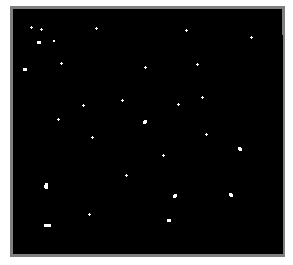



Text(0.5, 1.0, '1.d pic')

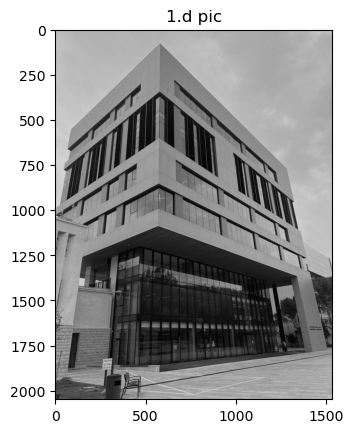

In [21]:
max_freq_filtering_dft, max_freq_filtering_img = max_freq_filtering(dft_shifted, 10)
plt.imshow(  max_freq_filtering_img,cmap='gray')
plt.title('1.d pic')

plt.imshow(  np.log(1+max_freq_filtering_dft),cmap='magma')
# plt.title('1.d dft')
#for i in range(0,len(max_freq_filtering_dft)):
 #   print(max_freq_filtering_dft[i])

### 1.e - Comparison - max frequencies vs. low frequencies
Repeat the previous section for `precentege=4` precent of maximal frequencies. What are the differences between this section results and the results from section **2.c.3** (the low frequencies in both axes)? In which case we get, after the inverse transform, an image which is closer to the original image? Are the maximal frequencies you got in this section located more in the low or in the high range? What can you conclude from this about the importance of **low frequencies** in comparison to the **maximal frequencies** for natural images?

#TODO: max more importnat then low
we can see clearly that the max frequencies image is in a much better quality (closer to the original) then the low frequencies one. as we studied in lectures the low frequencies are impirnat to get the general shape of the image while the high frequencies are more important to realize the minor details and fast changes of the image.

Text(0.5, 1.0, '1.e dft')

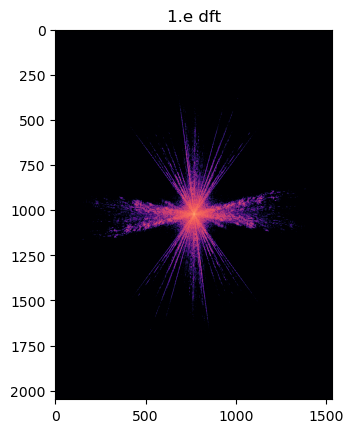

In [22]:
max_freq_filtering_dft, max_freq_filtering_img = max_freq_filtering(dft_shifted, 4)
plt.imshow(  max_freq_filtering_img,cmap='gray')
plt.title('1.e pic')

plt.imshow(  np.log(1+max_freq_filtering_dft),cmap='magma')
plt.title('1.e dft')

### 1.f - Influence of the max frequencies precentege
Now we will test the influence of `precentege`, the percentage of maximal frequencies to save, on the mean squared error (MSE) of the filtered image. The definition of MSE is:

$MSE(p)=\frac{1}{MN}\sum_{m=0}^{M-1}\sum_{n=0}^{N-1}(f[m,n]-f_p[m,n])^2$

Where $f[n,m] \in \mathbb{R}^{M\times N}$ is the original grayscale image and $f_p[n,m] \in \mathbb{R}^{M\times N}$ is the filtered image using only $p\%$ of the dominant frequencies.

For an integer $p$ in the range of $p \in [1,100]$, build a graph which illustrates the MSE as a function of p.

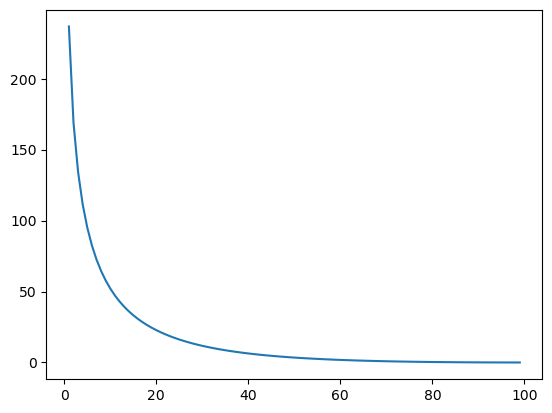

In [23]:
MSE = []
for i in range(1, 100):
    mff_img= max_freq_filtering(dft_shifted, i)[1]
    mse= np.sum((img - mff_img) ** 2) / (rows * cols)
    MSE.append(mse)
plt.plot(list(range(1, 100)), MSE)

## <img src="https://img.icons8.com/external-filled-outline-wichaiwi/64/000000/external-importance-key-performance-indicators-filled-outline-wichaiwi.png" style="height:50px;display:inline"/> Part 2 - The Importance of Phase and Amplitude in Images
---
**Note: In the illustrations displayed in this question the white areas are the areas to keep in the transform.**

The 2D-DFT of an image $f[n,m] \in \mathbb{R}^{M\times N}$ is complex: $F[k,l] \in \mathbb{C}^{M\times N}$. Therefore it can be written as:

$F[k,l] = A[k,l]e^{j\phi[k,l]}$

where $A[k,l]=|F[k,l]| \in \mathbb{R}^{M\times N}$ and $\phi[k,l]=tan^{-1}\frac{Im\{F[k,l]\}}{Re\{F[k,l]\}} \in \mathbb{R}^{M\times N}$ are the 2D-DFT's amplitude and phase, respectively. 

In this question we will understand the importance of these two elements of the transform.

### 2.a - Create the input - a selfie
Load the image `parrot.png`, and convert it to grayscale. In addition, take a Selfie picture (self-portrait) and call it `yours.jpg`. Load the selfie image, resize it to the same size of the parrot image (use `cv2.resize`) and convert it to grayscale. Finally, make sure that both images are in uint8 format. Display the images.

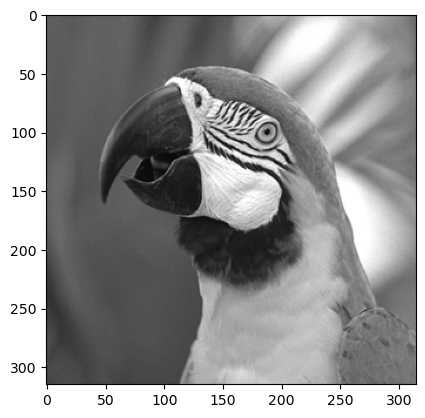

In [24]:
parrot = cv2.imread("../given_data/parrot.png")
yours = cv2.imread("../my_data/yours.jpg")
parrot_width,parrot_height = parrot.shape[:2]
resized_source = cv2.resize(yours, (parrot_width, parrot_height))

gray_yours = cv2.cvtColor(resized_source, cv2.COLOR_BGR2GRAY)
uint8_gray_yours = np.uint8(gray_yours)

gray_parrot = cv2.cvtColor(parrot, cv2.COLOR_BGR2GRAY)
uint8_gray_parrot = np.uint8(gray_parrot)
plt.imshow(  uint8_gray_yours,cmap='gray')
plt.imshow(  uint8_gray_parrot,cmap='gray')

### 2.b - Ampitude and phase of inputs
Calculate the 2D-DFT of both images. Calculate the phase and the amplitude of each image and display the amplitude images you got. Note: use `phase=np.angle(fft_image)` to calculate the phase and `amp=np.abs(fft_image)` to calculate the amplitude).

Text(0.5, 1.0, 'parrot_amp')

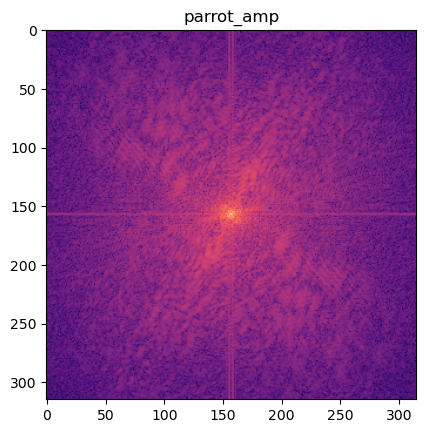

In [28]:
fft_image = np.fft.fft2(uint8_gray_yours)
fft_image_shifted = np.fft.fftshift(fft_image)
magnitude_spectrum_yours = np.log(1 + np.abs(fft_image_shifted))
phase=np.angle(fft_image_shifted)
amp=np.abs(fft_image_shifted)
plt.imshow(magnitude_spectrum_yours,cmap='magma')
plt.title('yours_amp')
plt.imshow(phase,cmap='gray')

fft_image_parrot = np.fft.fft2(uint8_gray_parrot)
fft_image_shifted_parrot = np.fft.fftshift(fft_image_parrot)
magnitude_spectrum_parrot = np.log(1 + np.abs(fft_image_shifted_parrot))
phase_parrot=np.angle(fft_image_shifted_parrot)
amp_parrot=np.abs(fft_image_shifted_parrot) 

plt.imshow(magnitude_spectrum_parrot,cmap='magma')
plt.title('parrot_amp')

plt.imshow(phase_parrot,cmap='gray')


### 2.c - Mixing things up
Create the following two images (in the transform domain):
1.	An image with the amplitude of `yours` and the phase of `parrot`.
2.	An image with the amplitude of `parrot` and the phase of `yours`.

Perform the inverse transform and display the resulting images. Obtain real values by applying `abs()` on the `ifft` result. Which image is more similar to the `yours` image?


(<matplotlib.image.AxesImage at 0x1598506f0d0>,
 Text(0.5, 1.0, 'amp_yours_phase_parrot'))

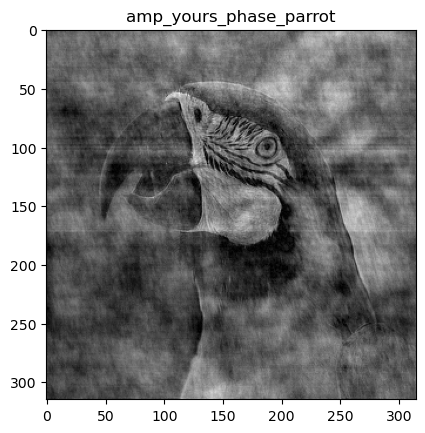

In [29]:
amp_yours_phase_parrot = amp * np.exp(1j * phase_parrot)
amp_parrot_phase_yours = amp_parrot * np.exp(1j * phase)

dft=np.fft.ifftshift(amp_yours_phase_parrot)
img = np.fft.ifft2(dft)
img_abs=np.abs(img)

dft_2=np.fft.ifftshift(amp_parrot_phase_yours)
img_2 = np.fft.ifft2(dft_2)
img_2_abs=np.abs(img_2)

plt.imshow(img_abs, cmap='gray'), plt.title('amp_yours_phase_parrot')
plt.imshow((img_2_abs), cmap='gray'), plt.title('amp_parrot_phase_yours')
#phase determains

### 2.d - Let's be random
Create the following two images (in the transform domain):
1.	An image with a random amplitude (consider the range of values you randomly draw - use uniform distribution) and the phase of `yours`.
2.	An image with the amplitude of `yours` and a random phase (again, consider the range of values and use uniform distribution).

Perform the inverse transform and display the resulting images. Obtain real values by applying `abs()` on the `ifft` result. Explain the differences between the images in this section and the previous one. What can we learn from each of the images?


Text(0.5, 1.0, 'random_amp_yours_phase')

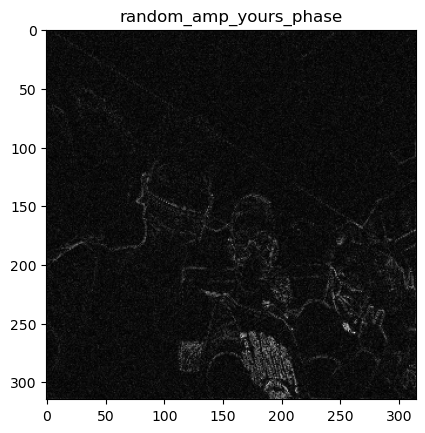

In [30]:
max_amp=np.max(amp)
min_amp=np.min(amp)
# amplitude_range = (min_amp, max_amp)
# phase_range = (0, 2*np.pi)
amplitude_random = np.random.uniform(min_amp, max_amp, uint8_gray_yours.shape)
phase_random = np.random.uniform(0,2*np.pi, uint8_gray_yours.shape)

random_amp_yours_phase = amplitude_random * np.exp(1j * phase)
yours_amp_random_phase =  amp * np.exp(1j * phase_random)

# random_amp_yours_phase_no_shift = np.fft.ifftshift(random_amp_yours_phase)
# yours_amp_random_phase_no_shift = np.fft.ifftshift(yours_amp_random_phase)

plt.imshow(np.abs(np.fft.ifft2(random_amp_yours_phase)), cmap='gray')
plt.title('random_amp_yours_phase')

plt.imshow(np.abs(np.fft.ifft2(yours_amp_random_phase)), cmap='gray')
plt.title('yours_amp_random_phase')


### 2.e - Conclude
Based on the results of the previous sections, which one is more important in the information of the image: the phase or the amplitude?

**Note:** For those interested, the course Moodle website includes an article on amplitude and phase in Fourier transform.

## <img src="https://img.icons8.com/ios-glyphs/30/000000/sample-rate.png" style="height:50px;display:inline"/> Part 3 - Sampling
---
In the image below you can see the sampled function $ F_1(x,y) $ with $\Delta x=1$, $\Delta y=1$, where the first sample is each axi at $0$ (the top left corner of the image), and the rest of the samples are in higher frequencies. The mentioned function is a combination of addition/multiplication of three $\sin$ functions, $\sin(2\pi f_i i)$, with the following frequencies $f=\{\frac{2}{512}, \frac{5}{512}, \frac{40}{512}\}$, where $i = \{x, y, x+y\}$ (not necessarily in that order). All of the sin amplitude are equal to $1$. The image size is $ 512\times512. $ 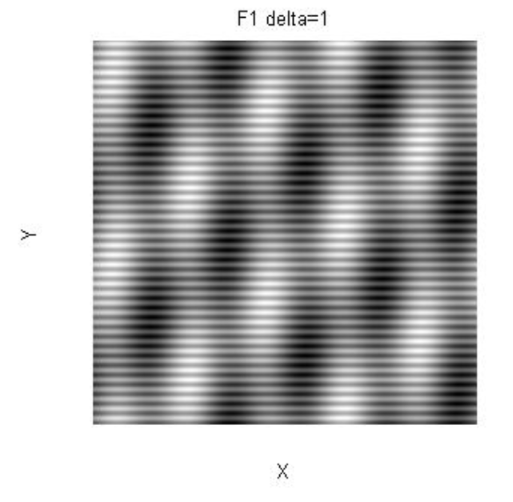

### 3.a - Find $F_1 (x,y)$
Look at the image above, according to the change in amplitude in the $x, y$ and $x+y$ direction, what is the explicit term for $F_1 (x,y)$? Explain.

Reconstruct $F_1 (x,y)$ like in the image above and present the your result in as a normalized grey scale image.

(<matplotlib.image.AxesImage at 0x1598d784b50>, Text(0.5, 1.0, 'f1'))

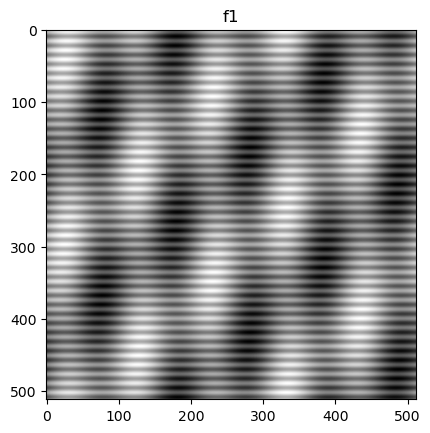

In [35]:
x_1 = np.linspace(0, 511, 512)
y_1 = np.linspace(0, 511, 512) 
x, y = np.meshgrid(x_1, y_1)
f1_func=np.sin(2*np.pi*40/512*y)+np.sin(5/512*2*np.pi*x)+np.sin(2/512*2*np.pi*(x+y))
#gray_f1 = cv2.cvtColor(f1, cv2.COLOR_BGR2GRAY)
#uint8_gray_f1 = np.uint8(gray_f1)
plt.imshow(f1_func, cmap='gray'), plt.title('f1')


### 3.b - $F_1 (x,y) $ Fourier tranform 
Present $ F_1 (x,y) $ in the frequency space as a gray scale image. Make sure that the image size is the same as the original image. Explain the frequency space image, and the phenomena we can observe from it (aliasing etc.)

(200.0, 300.0)

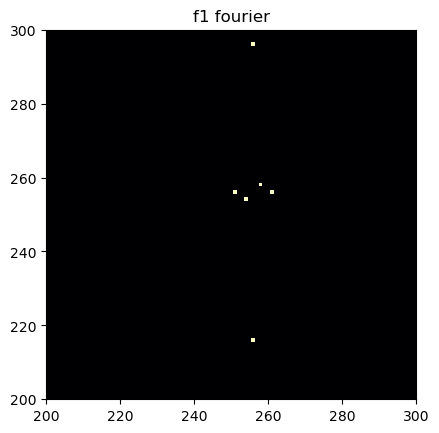

In [49]:
fft_image_f1 = np.fft.fft2(f1_func)
fft_image_shifted_f1 = np.fft.fftshift(fft_image_f1)
magnitude_spectrum_f1 = np.log(1 + np.abs(fft_image_shifted_f1))
plt.imshow(magnitude_spectrum_f1, cmap='magma'), plt.title('f1 fourier')
plt.xlim(200, 300)  # Set x-axis limits
plt.ylim(200, 300)
#phase_parrot=np.angle(fft_image_shifted_parrot)

### 3.c - $F_{10} (x,y) $
We now change the sampling interval to $ \Delta x = \Delta y = 10 $. Present the gray scale image of $ F_{10} $ in $ xy $ space and in the frequency space. Both images should be $52 \times 52 $. You  can sample $ F_{10} $ out of $ F_1 $ . Explain the difference between the images of $ F_{10} $ and $ F_1 $. 

(<matplotlib.image.AxesImage at 0x15994ee5650>, Text(0.5, 1.0, 'f10 fourier'))

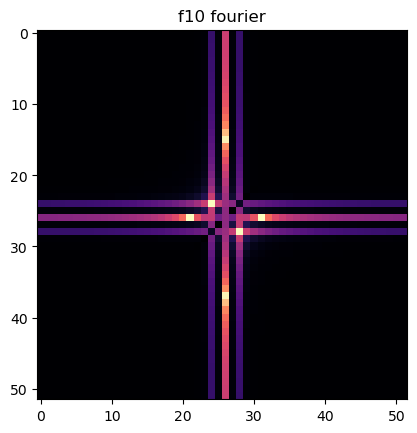

In [48]:
x_1 = np.linspace(0, 511, 52)
y_1 = np.linspace(0, 511, 52) 
x, y = np.meshgrid(x_1, y_1)
f10_func=np.sin(2*np.pi*40/512*y)+np.sin(5/512*2*np.pi*x)+np.sin(2/512*2*np.pi*(x+y))
#gray_f1 = cv2.cvtColor(f1, cv2.COLOR_BGR2GRAY)
#uint8_gray_f1 = np.uint8(gray_f1)
plt.imshow(f10_func, cmap='gray'), plt.title('f10')
fft_image_f10 = np.fft.fft2(f10_func)
fft_image_shifted_f10 = np.fft.fftshift(fft_image_f10)
magnitude_spectrum_f10 = np.log(1 + np.abs(fft_image_shifted_f10))
plt.imshow(magnitude_spectrum_f10, cmap='magma'), plt.title('f10 fourier')

### 3.d - Sampling limit 
What limits do we have when sampling the image $ F_{1} $? what is the source of those limitations? are there different limitation when sampling in different directions? Explain and specify whether you are referring to limitation in the $ xy $ plain or the frequency space.

### 3.e - Real Image
Load the image Mandrill.jpg and display its grayscale image and frequency amplitude (in the form of $ \log_{10}(|A|+1) $).

(<matplotlib.image.AxesImage at 0x1599ebe86d0>,
 Text(0.5, 1.0, 'mandrill fourier'))

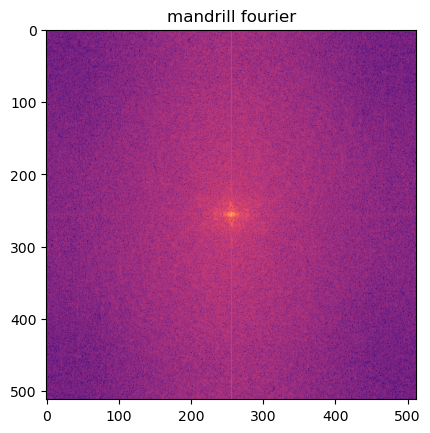

In [51]:
mandrill = cv2.imread("../given_data/Mandrill.jpg")
gray_mandrill = cv2.cvtColor(mandrill, cv2.COLOR_BGR2GRAY)
uint8_gray_mandrill = np.uint8(gray_mandrill)
plt.imshow(  uint8_gray_mandrill,cmap='gray'), plt.title('mandrill')
fft_image_mandrill = np.fft.fft2(uint8_gray_mandrill)
fft_image_shifted_mandrill = np.fft.fftshift(fft_image_mandrill)
magnitude_spectrum_mandrill = np.log(1 + np.abs(fft_image_shifted_mandrill))
plt.imshow(magnitude_spectrum_mandrill, cmap='magma'), plt.title('mandrill fourier')

### 3.f - Down-sampling 
Down-sample the image so its size is $ 128 \times 128 $ (sample the fourth pixel in each direction). Present the new image in the space and frequency domain, and compare your results to the results in previous section.

(<matplotlib.image.AxesImage at 0x1599e3ffb90>,
 Text(0.5, 1.0, 'resized mandrill fourier'))

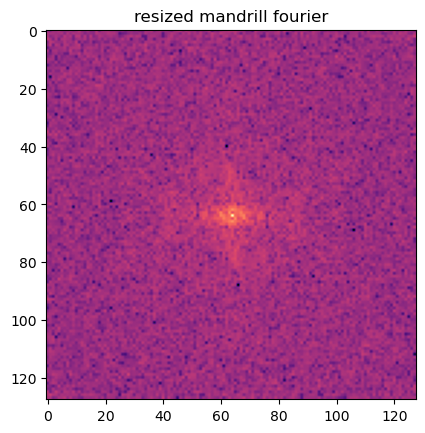

In [56]:
resized_mandrill = uint8_gray_mandrill[::4,::4] 
plt.imshow(  resized_mandrill,cmap='gray'), plt.title('resized mandrill')


fft_image_resized_mandrill = np.fft.fft2(resized_mandrill)
fft_image_shifted_resized_mandrill = np.fft.fftshift(fft_image_resized_mandrill)
magnitude_spectrum_resized_mandrill = np.log(1 + np.abs(fft_image_shifted_resized_mandrill))
plt.imshow(magnitude_spectrum_resized_mandrill, cmap='magma'), plt.title('resized mandrill fourier')



## 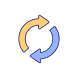 Part 4 - Displacement and Rotation
---
A image could be displaced in a non-natural number of pixel by using a [bilinear interpolation](https://en.wikipedia.org/wiki/Bilinear_interpolation). To do so, we sum 4 pixel, the 4 pixel surrounding the non-natural pixel, as such:
$$ g(x,y) = \begin{bmatrix}
1-\alpha & \alpha
\end{bmatrix}
\begin{bmatrix}
f(i,j) & f(i,j+1) \\
f(i+1,j) & f(i+1,j+1)
\end{bmatrix}
\begin{bmatrix}
1-\beta \\
\beta
\end{bmatrix}$$

where $\alpha$ and $\beta$ are constants such that $\alpha,\beta\in[0,1)$.


### 4.a - Building a Bilinear Interpolator 
Explain the intuition behind the bilinear interpolation equations, and write a function that preforms a cyclic displacement to a pixel using the bilinear interpolation equation. That is, assume that when reaching the edge of the image we interpolate the pixel with the other edge of the image. Assume that the displacemt is given by two parameters $[\Delta x,\Delta y]$ where $[\Delta x,\Delta y]\in[0,1)$.

In [ ]:
def bilinear_displacement(dx, dy, image):
    """
    Calculate the displacement of a pixel using a bilinear interpolation.
    :param dx: the displacement in the x direction. dx in rang [0,1).
    :param dy: the displacement in the y direction. dy in rang [0,1).
    :param image: The image on which we preform the cyclic displacement
    :return:
        displaced_image: The new displaced image
    """
    # ====== YOUR CODE: ======
    displaced_image=image.copy()
    height, width = image.shape[:2]
    for h in range(0,height):
        for w in range(0,width):
            target_x= h+dx
            target_y= w+dy
            x_floor = np.floor(target_x).astype(int)
            y_floor = np.floor(target_y).astype(int)
            x_ceil = np.ceil(target_x).astype(int)
            y_ceil = np.ceil(target_y).astype(int)
            #a, b = h - x_floor, w - y_floor
            a, b = dx, dy
            matrix = np.array([[image[x_floor, y_floor], image[x_floor, y_ceil % height]],
                                   [image[x_ceil % width, y_floor], image[x_ceil % height, y_ceil % width]]])
            displaced_image[h][w]=np.array([a, 1 - a]) @ matrix @ np.array([b, 1 - b])
    # ========================
    return displaced_image
 


In [ ]:
#plt.imshow(uint8_gray_yours, cmap='gray'), plt.title('complex_image_2')

In [ ]:
#plt.imshow(bilinear_displacement(0.55, 0.77, uint8_gray_yours), cmap='gray'), plt.title('complex_image_2')

### 4.b - General Displacement
Use the function from the previous section, and write a new function that preforms a cyclic  displacement for $\Delta x, \Delta y$ (not necessarily in the range $[0,1)$). 

In [ ]:
def general_displacement(dx, dy, image):
    """
    Calculate the displacement of a pixel using a bilinear interpolation.
    :param dx: the displacement in the x direction.
    :param dy: the displacement in the y direction.
    :param image: The image on which we preform the cyclic displacement
    :return:
        displaced_image: The new displaced image
    """
    # ====== YOUR CODE: ======
    dx_floor = np.floor(dx).astype(int)
    dy_floor = np.floor(dy).astype(int)
    shift_img = np.roll(image, shift=dx_floor, axis=1)
    shift_img = np.roll(shift_img, shift=dy_floor, axis=0)
    displaced_image= bilinear_displacement(dx - dx_floor, dy - dy_floor, shift_img)
    # ========================
    return displaced_image


### 4.c - Testing our functions
load the image cameraman.jpg and convert it to a grayscale image. Use your functions from the previous section to move it by $ [dx,dy]=[150.7,110.4] $. Show the original image next to the displaced image.

In [ ]:
cameraman = cv2.imread("../given_data/cameraman.jpg")
gray_cameraman = cv2.cvtColor(cameraman, cv2.COLOR_BGR2GRAY)
uint8_gray_cameraman = np.uint8(gray_cameraman)
plt.imshow(general_displacement(150.7 ,110.4, uint8_gray_cameraman), cmap='gray'), plt.title('displaced cameraman')


In [ ]:
plt.imshow(uint8_gray_cameraman, cmap='gray'), plt.title(' cameraman')


### 4.d - Masking Ryan
Load the image Ryan.jpg, convert it to grayscale and create a mask that will capture Ryan's head. The mask should have the value $ 0 $ everywhere beside a lower half circle which is placed over Ryan's head. Name your mask "mask1" and the masked image of Ryan as "ryan_win". Present the original image and the masked image.

In [ ]:
ryan = cv2.imread("../given_data/Ryan.jpg")
gray_ryan = cv2.cvtColor(ryan, cv2.COLOR_BGR2GRAY)
uint8_gray_ryan = np.uint8(gray_ryan)
mask1 = np.zeros_like(uint8_gray_ryan)
ryan_head_x = 30
ryan_head_y = 310
radius = ryan_head_x + 150
height,width = uint8_gray_ryan.shape[:2]
for h in range(0,height):
    for w in range(0,width):
        if ((h-ryan_head_x)**2 + (w-ryan_head_y)**2) <= radius**2 and h>ryan_head_x:
            mask1[h,w]=1
ryan_win = uint8_gray_ryan*mask1
plt.imshow(ryan_win, cmap='gray'), plt.title('  ryan_win')
plt.imshow(uint8_gray_ryan, cmap='gray'), plt.title(' original ryan')

### 4.e - Rotating Ryan
In order to rotate an image with the angle $\theta$ in the anti-clock direction, you need to multiply the image by the rotation matrix: $ \begin{bmatrix} \cos(\theta) & \sin(\theta) \\ -\sin(\theta) & \cos(\theta) \\ \end{bmatrix} $. Note that the rotation is preformed around the center of the image (what will happen if the rotation is not around the center of the image?).
Write a function that rotates ryan_win in angles: $ \{\frac{\pi}{4}, \frac{\pi}{3}, \frac{\pi}{2}\} $. Note that when rotating the image, some pixel won't have value assigned, set those pixel to $ 0 $. If after rotating you get a non integer index, round the index to the closest integer.
Display your results and explain the difference between the outputs.

In [ ]:
def rotating_img(image, theta):
    """
    Calculate the displacement of a pixel using a bilinear interpolation.
    :param image: the image to rotate.
    :param theta: Angle of rotation in radians.
    :return:
       rotated_image: The new displaced image
    """
    # ====== YOUR CODE: ======
    matrix = np.array([[np.cos(theta), np.sin(theta)],
                                    [-np.sin(theta), np.cos(theta)]])
    
    width,height = image.shape[:2]
    center_y = height/2
    center_x = width/2

#     #rotated_image = image.copy() 
    rotated_image = np.zeros_like(image)
    for x in range(0,width):
        for y in range(0,height):
            new_location = [x-center_x,y-center_y]
            rotation_result = np.array(new_location) @ matrix 
            round_x = round(rotation_result[0])+ int(center_x)
            round_y = round(rotation_result[1]) + int(center_y)
            if 0<=round_y<height and 0<=round_x<width:
                rotated_image[round_x,round_y] = image[x,y]
            
    # ========================
    return rotated_image



In [ ]:
plt.imshow(rotating_img(ryan_win,np.pi*0.5), cmap='gray'), plt.title('ryan_win pi/2 rotate')
plt.imshow(rotating_img(ryan_win,np.pi*0.25), cmap='gray'), plt.title('ryan_win pi/4 rotate')
plt.imshow(rotating_img(ryan_win,np.pi*0.333), cmap='gray'), plt.title('ryan_win pi/3 rotate')

## <img src="https://img.icons8.com/dusk/64/000000/prize.png" style="height:50px;display:inline"> Credits
---
* Icons from <a href="https://icons8.com/">Icon8.com</a> - https://icons8.com